In [1]:
# a Importing Necessary packages
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import random
import numpy as np

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2757 - loss: 1.9954 - val_accuracy: 0.3595 - val_loss: 1.7984
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3866 - loss: 1.7381 - val_accuracy: 0.3964 - val_loss: 1.7016
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4158 - loss: 1.6600 - val_accuracy: 0.4192 - val_loss: 1.6389
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4397 - loss: 1.6002 - val_accuracy: 0.4341 - val_loss: 1.6105
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4464 - loss: 1.5674 - val_accuracy: 0.4417 - val_loss: 1.5896
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4630 - loss: 1.5339 - val_accuracy: 0.4383 - val_loss: 1.5767
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4767 - loss: 1.4965 - val_accuracy: 0.4402 - val_loss: 1.5677
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4858 - loss: 1.4728 - 

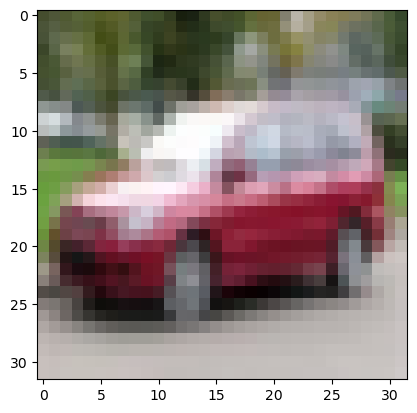

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
Predicted value: 1


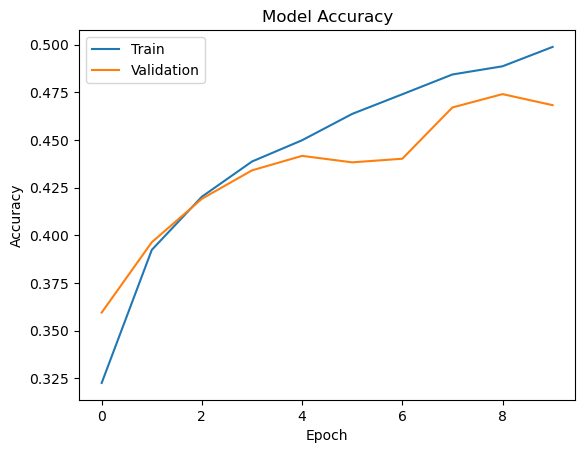

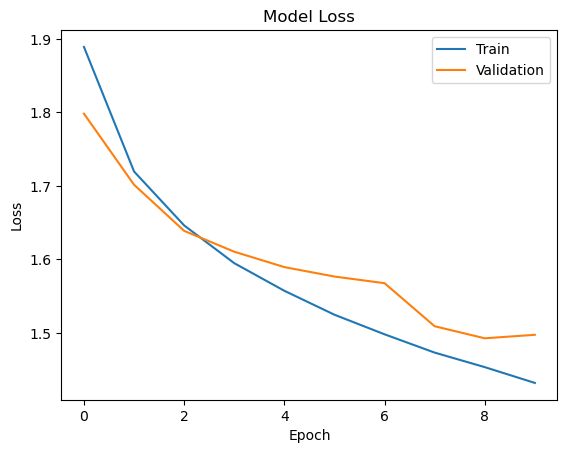

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step


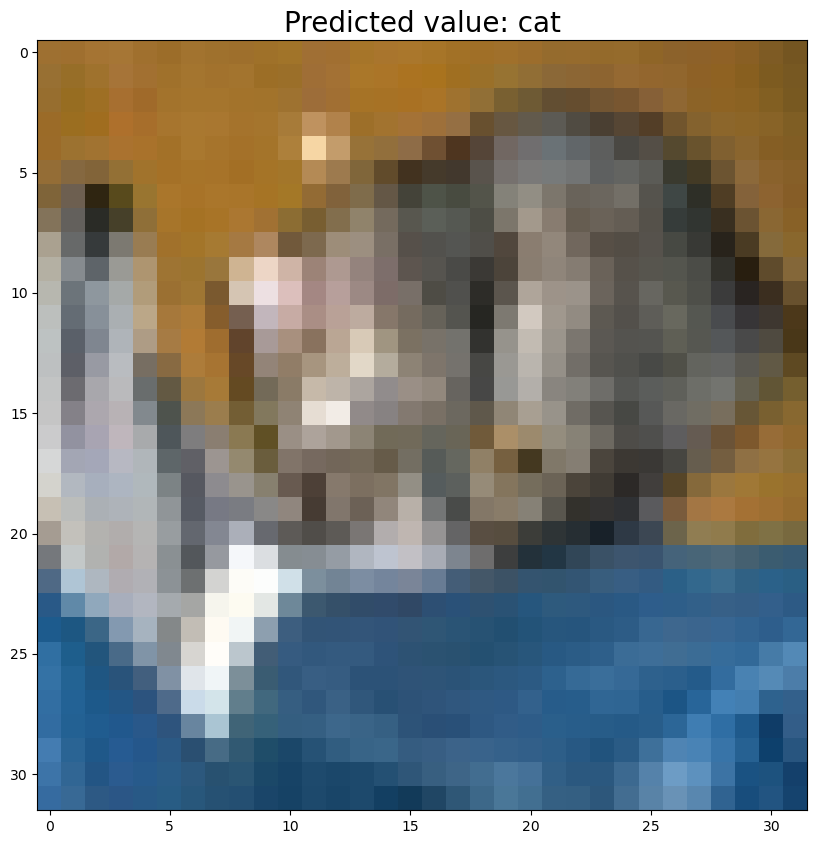

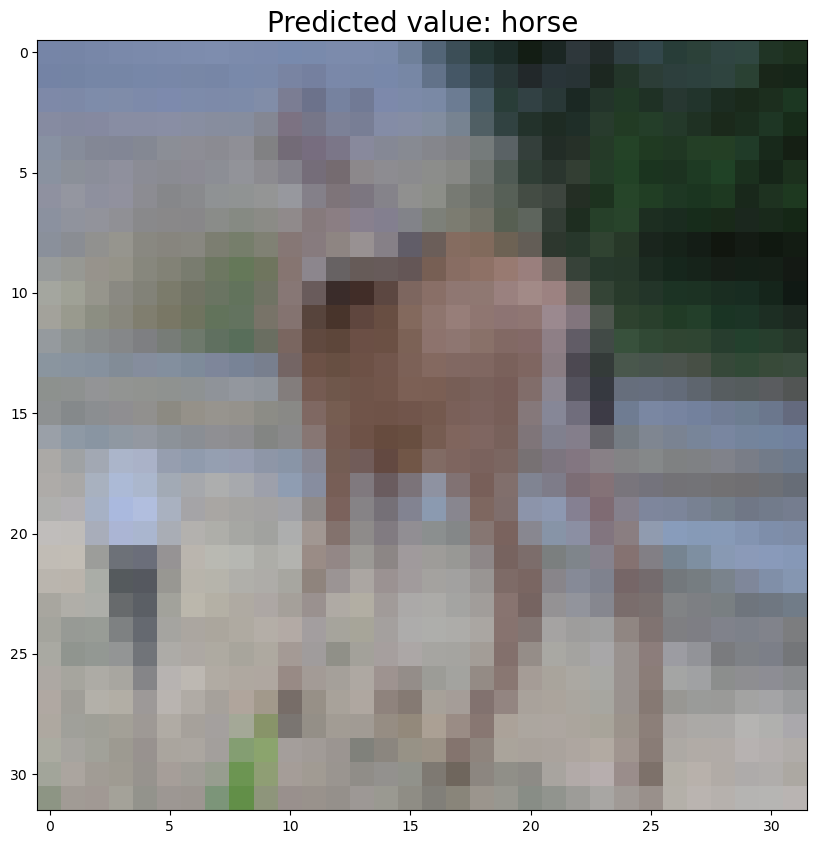

In [7]:
# Importing Necessary packages
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np

# Load the training and testing data (CIFAR-10)
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizing or scaling data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the network architecture using Keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),  # Flatten 32x32x3 images to a single vector
    keras.layers.Dense(128, activation='relu'),      # Dense layer with 128 neurons
    keras.layers.Dense(10, activation='softmax')     # Output layer with 10 classes for CIFAR-10
])

model.summary()

# Train the model using SGD
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# Evaluate the network
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss=%.3f' % test_loss)
print('Test Accuracy=%.3f' % test_acc)

# Randomly select an image and display the prediction
n = random.randint(0, x_test.shape[0] - 1)
plt.imshow(x_test[n])
plt.show()

predicted_value = model.predict(x_test)
predicted_label = np.argmax(predicted_value[n], axis=0)
print('Predicted value:', predicted_label)

# Plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


predictions = model.predict(x_test)
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=[10,10])
plt.imshow(x_test[0].reshape(32, 32, -1))
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[0], axis=0)]), size=20)
plt.grid(False)
plt.figure(figsize=[10,10])
plt.imshow(x_test[100].reshape(32, 32, -1))
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[100], axis=0)]), size=20)
plt.grid(False)

In [18]:
# Importing Necessary packages
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

# Load CIFAR-10 data from CSV files
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('train.csv')

# Extract labels and images
y_train = train_data.iloc[:, 0].values  # First column as labels
x_train = train_data.iloc[:, 1:].values  # Remaining columns as image data
y_test = test_data.iloc[:, 0].values
x_test = test_data.iloc[:, 1:].values

# Reshape the data to match CIFAR-10 image dimensions (32x32x3)
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

# Normalize the data to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the network architecture using Keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),  # Flatten 32x32x3 images to a single vector
    keras.layers.Dense(128, activation='relu'),      # Dense layer with 128 neurons
    keras.layers.Dense(10, activation='softmax')     # Output layer with 10 classes for CIFAR-10
])

model.summary()

# Train the model using SGD
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# Evaluate the network
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss=%.3f' % test_loss)
print('Test Accuracy=%.3f' % test_acc)

# Randomly select an image and display the prediction
n = random.randint(0, x_test.shape[0] - 1)
plt.imshow(x_test[n])
plt.show()

predicted_value = model.predict(x_test)
predicted_label = np.argmax(predicted_value[n], axis=0)
print('Predicted value:', predicted_label)

# Plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,490 (517.54 KB)

 Trainable params: 132,490 (517.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 32, 32, 3), dtype=float32). Expected shape (None, 32, 32), but input has incompatible shape (None, 32, 32, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
  • training=True
  • mask=None

In [6]:
# b Load the training and testing data (MNIST)
mnist = tf.keras.datasets.cifar10

In [3]:
# splitting it into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
for i in (x_train, y_train, x_test, y_test):
  print(i.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2159s 13us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
# Normalising or scalling data
x_train = x_train / 255
x_test = x_test / 255

#x_train = x_train[0]
#img_len, img_width = x_train.shape
#print('Size of input image:' ,img_len, 'x', img_width)

In [6]:
print(x_train.shape, x_test.shape)

(32, 32, 3) (10000, 32, 32, 3)


In [7]:
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [8]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [9]:
print(y_train.shape, y_test.shape)


(50000, 10) (10000, 10)


In [2]:
# c Define the network architecture using keras

model = keras.Sequential([
keras.layers.Flatten(input_shape=(32,32)),
keras.layers.Dense(128, activation = 'relu'),
keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

NameError: name 'keras' is not defined

In [21]:
# d train the model using SGD
from tensorflow import keras

# Create a sequential model
model = keras.Sequential()

# Convolutional layers
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

# Fully connected layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))  # 10 classes for classification

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to check the architecture
model.summary()

# model.compile(optimizer="sgd",loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             # metrics=['accuracy'])

#history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)
# Training the model
# Training the model with adjusted batch size if necessary
try:
    history = model.fit(
        x_train,
        y_train,
        batch_size=min(30, len(x_train)),  # Adjust batch size if needed
        epochs=10,
        validation_data=(x_test, y_test),
        shuffle=True
    )
except ValueError as e:
    print(f"Error during model training: {e}")
    
    


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Error during model training: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 32
'y' sizes: 50000



In [22]:
# e Evaluuate the network

test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss=%.3f' %test_loss)
print('Accuracy=%.3f' %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0985 - loss: 2.3026
loss=2.303
Accuracy=0.101


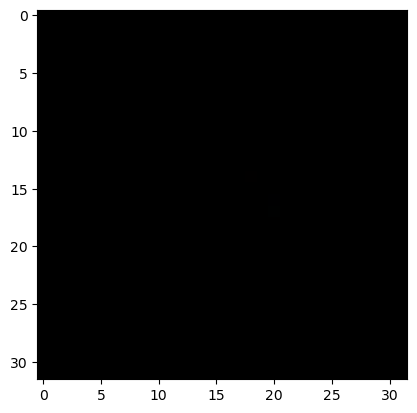

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


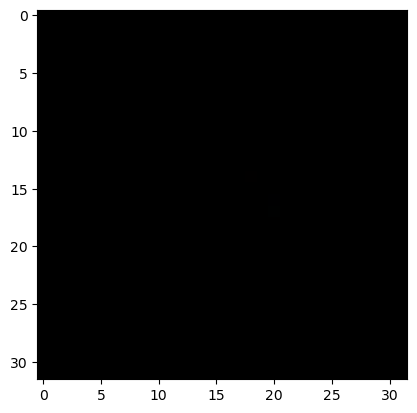

7


In [23]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()
print(np.argmax(predicted_value[15], axis=0))

In [24]:
print('predicted value: ', predicted_value[n])

predicted value:  [0.1000407  0.09999011 0.0999752  0.10000849 0.10001836 0.09996371
 0.0999291  0.10004218 0.10003413 0.09999804]


In [25]:
# f plot the training loss and accuracy

# plotting the training accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plotting the training loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

NameError: name 'history' is not defined

In [4]:
# Plotting the Model Accuracy & Model Loss vs Epochs
plt.figure(figsize=[10,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')


# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'plt' is not defined

In [3]:
history = model.fit(x_train, y_train,
              batch_size=30,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

NameError: name 'model' is not defined